#We are going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating Tensors
* Tensors and Numpy
* Using @tf.function (a way to speed up your regular python functions)
* Using GPUs with TensorFlow
* Excercises to try for yourself

# Introduction to Tensor

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
#Creating tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of dimensions of a tensor
scalar.ndim

0

In [ ]:
#create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
vector.ndim

1

In [ ]:
#Create a matrix
matrix = tf.constant([[10,7],[7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

# Creating tensors with `tf.variable`

In [ ]:
#Create the same tensor with tf.variable
changeable_tensor = tf.Variable([10,7])
uncheangeable_tensor = tf.constant([10,7])
changeable_tensor, uncheangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
#Let's try change one of the elements in the changeable_tensor
changeable_tensor[0] = 7
changeable_tensor

TypeError: ignored

In [ ]:
changeable_tensor[0].assign(7)
changeable_tensor



<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
# Let's try to change the uncheangeable_tensor
uncheangeable_tensor[0] = 7
changeable_tensor


TypeError: ignored

In [ ]:
uncheangeable_tensor[0].assign(7)
uncheangeable_tensor


AttributeError: ignored

Conclusion: the property `tf.Variable` enables you to create tensors that will change in time, but the property `tf.constant` doesn't allow you to change the values assigned to that element when was created

#Creating random tensors
Tensors of arbitray size with random number

In [ ]:
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3,2)) #take values from an uniform distribution 
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

## Shuffle the order of elements in a Tensor

In [ ]:
# Shuffle a tensor (valuable when you want to shuffle your data when inherent order affects)
not_shuffled = tf.constant([[10,7],
                            [3,4],
                            [2,5]])
print('number of elements (tensor dimensions): ',not_shuffled.ndim)
# Shuffle our non-shuffle Tensor
tf.random.shuffle(not_shuffled)

number of elements (tensor dimensions):  2


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  5],
       [ 3,  4]], dtype=int32)>

In [ ]:
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

## Other ways to make tensors

In [ ]:
# create a tensor of all ones
tf.ones([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# create a tensor of all zeros
tf.zeros(shape=(10,7))

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

## Turn NumPy arrays into tensors
the main difference between NumPy arrays and tensors is that tensors can be run
on a GPU

In [ ]:
# you can also turn numpy arrays into tensors
import numpy as np

numpy_A = np.arange(1,25, dtype = np.int32)
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [ ]:
# changing the shape
A = tf.constant(numpy_A, shape = (2,3,4))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

## Getting information from tensors
* Shape
* Rank
* Axis of dimension
* Size

In [ ]:
rank_4_tensor = tf.zeros(shape = [2,3,4,5])

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

## Indexing and expanding tensors
tensor can be indexed just like Python list

In [ ]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
# get the first element form each dimension from each index, except for the finale one
rank_4_tensor[:1,:1,:1,:]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
# Adding an extra dimension to our rank 2 tensor
rank_2_tensor = tf.constant([[10,7],
                             [3,4]])

In [ ]:
rank_3_tensor = rank_2_tensor[...,tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
# alternative to tf.newaxis
tf.expand_dims(rank_2_tensor,axis=-1) # -1 means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

## Manipulating tensors with basic operations

In [ ]:
tensor = tf.constant([[10,7],[3,4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
# We can use the tensorflow built-in tensor function
tf.multiply(tensor,2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 14],
       [ 6,  8]], dtype=int32)>

## Matrix multiplication with tensors
You can perform matrix multiplication with:
* tf.matmul()
* tf.tensordot()

In [ ]:
tf.matmul(tensor,tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
#but tensor * tensor is element wise, not the real matrix multiplication
tensor * tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

## Changing the datatype of your tensor

In [ ]:
#create a new tensor with a default datatype
B = tf.constant([1.7,7.4])
B.dtype

tf.float32

In [ ]:
C = tf.constant([7,10])
C.dtype

tf.int32

In [ ]:
# change from float32 to float16 (reduced precision)
B = tf.cast(B, dtype = tf.float16)
B.dtype

tf.float16

## tf aggregation, finding the min, max, mean, and more

aggregating tensors = condensing them from multiply values down to a smaller amount of values



In [ ]:
# Getting the absolute values 
D = tf.constant([10,-7])

In [ ]:
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>

In [ ]:
E = tf.constant(np.random.randint(0,100,size=50))

In [ ]:
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [ ]:
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=97>

In [ ]:
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=47>

In [ ]:
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2362>

## Squeezing a tensor (removing all 1 dimension axes)

In [ ]:
G = tf.constant(tf.random.uniform(shape=[50]),shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.2281977 , 0.98624575, 0.784652  , 0.6533729 , 0.84080875,
           0.82716334, 0.91428316, 0.91046095, 0.7148596 , 0.86299455,
           0.10830986, 0.946591  , 0.8140428 , 0.9880066 , 0.22772098,
           0.68532693, 0.5102211 , 0.53837144, 0.29503155, 0.6730721 ,
           0.6372758 , 0.00505066, 0.2775147 , 0.9778849 , 0.7950635 ,
           0.3995502 , 0.52111125, 0.8983388 , 0.06820107, 0.7345923 ,
           0.49435008, 0.95458376, 0.4427985 , 0.7792649 , 0.5960419 ,
           0.6837776 , 0.81256497, 0.24281335, 0.47421563, 0.17648208,
           0.00697315, 0.02251685, 0.7472323 , 0.76215184, 0.4017837 ,
           0.8155205 , 0.9659678 , 0.4967953 , 0.25113618, 0.2722479 ]]]]],
      dtype=float32)>

In [ ]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [ ]:
G_squeezed = tf.squeeze(G) #removes all dimensions of size 1
G_squeezed.shape

TensorShape([50])

## One-Hot encoding

In [ ]:
# create a list of indices
some_list = [0,1,2,3] #could be red, blue, green, black

#one-hot encode our list of indices
tf.one_hot(some_list,4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

## Tensors and NumPy

In [ ]:
# Creates a tensor directly from a NumPy array
J = tf.constant(np.array([3,7,10]))

In [ ]:
# Converting our tensor back to NumPy
np.array(J)

array([ 3,  7, 10])

In [ ]:
J = tf.constant([3])
J

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([3], dtype=int32)>

In [ ]:
J.numpy()

array([3], dtype=int32)

# Neural Netwrok regression with TensorFlow

## Creating sample regression data

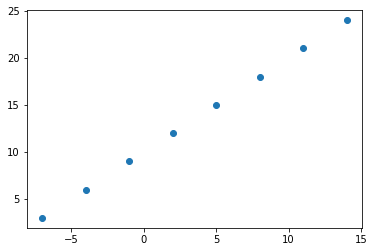

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);
     

In [ ]:

# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

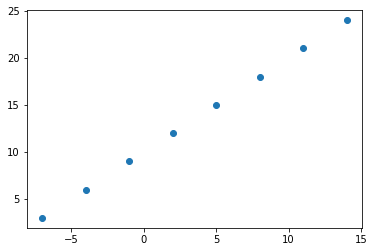

In [ ]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Creating a tensorflow model


In [ ]:
#setting the random seed
tf.random.set_seed(42)

#Create a model using the Sequential API
model = tf.keras.Sequential([ #from here I will add the layers to my model
  tf.keras.layers.Dense(1) #Just one layer, which is dense (fully connected)
])

#Compiling the model: defining the metrics for performance
model.compile(loss=tf.keras.losses.mae, #the loss will be measure with mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #how the model will be improved between runs, stochastic gradient descent 
              metrics = ['mae']) #how the output performance will be measured

#Now that I have the structure of the model and the way it is gonna work (metrics and optimizer)
#I can continue with fitting the data, training the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5) #epchs: number of time the fitting will be performed

Epoch 1/5
1/1 [==============================] - 1s 713ms/step - loss: 16.0915 - mae: 16.0915
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 15.8102 - mae: 15.8102
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 15.5290 - mae: 15.5290
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 15.2477 - mae: 15.2477
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 14.9665 - mae: 14.9665


In [ ]:
#Making a prediction with the model
model.predict([17]) 

1/1 [==============================] - 0s 135ms/step


array([[-6.3199644]], dtype=float32)

Horrible prediction, it should be something close to 27 

## Improving our model



In [ ]:
#Let's start training the model for longer
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 20ms/step - loss: 14.7714 - mae: 14.7714
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 14.6389 - mae: 14.6389
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 14.5064 - mae: 14.5064
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.3739 - mae: 14.3739
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 14.2414 - mae: 14.2414
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 14.1089 - mae: 14.1089
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 13.9764 - mae: 13.9764
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 13.8439 - mae: 13.8439
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 13.7114 - mae: 13.7114
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 13.5789 - mae: 13.5789
Epoch 11/100
1/1 [==============================]

In [ ]:
#Making a prediction with the model
model.predict([17]) 

1/1 [==============================] - 0s 69ms/step


array([[29.68253]], dtype=float32)

Wow, it seems like this leads to a huge improvement!

In [ ]:
#Another change to improve our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, #the loss will be measure with mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #how the model will be improved between runs, stochastic gradient descent 
              metrics = ['mae']) #how the output performance will be measured

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 648ms/step - loss: 13.1464 - mae: 13.1464
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5864 - mae: 12.5864
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 12.0553 - mae: 12.0553
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5188 - mae: 11.5188
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 10.9949 - mae: 10.9949
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4518 - mae: 10.4518
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 9.9162 - mae: 9.9162
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 9.3838 - mae: 9.3838
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 8.8241 - mae: 8.8241
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 8.2269 - mae: 8.2269
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
model.predict([17])  

1/1 [==============================] - 0s 72ms/step


array([[31.365686]], dtype=float32)

## Evaluating a model

In [2]:
#Maker a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
#Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [4]:
# Visualize the data
import matplotlib.pyplot as plt


In [5]:
#check the length our data
len(X)

50